In [3]:
from agentlab.experiments.exp_utils import RESULTS_DIR
from agentlab.analyze import inspect_results
from agentlab.experiments.study import get_most_recent_study
print(RESULTS_DIR)

/Users/jasminexli/agentlab_results


In [1]:
from pathlib import Path
import sys
repo_src = Path("/Users/jasminexli/grayswan/site-snapshot-test/AgentLab/src")
if str(repo_src) not in sys.path:
    sys.path.insert(0, str(repo_src))
import agentlab.experiments.loop

### Load results
find the most recent study and load all summary information in a result dataframe.

The summary information contains the configuration of the environment, and the agents and various statistics about the experiment. It doesn't contain the details about the episode such as DOM or AXTree for faster loading.

In [4]:
# replace this by your desired directory if needed.
result_dir = get_most_recent_study(RESULTS_DIR, contains=None)

print(result_dir)
result_df = inspect_results.load_result_df(result_dir)

/Users/jasminexli/agentlab_results/2025-10-13_21-02-41_genericagent-gpt-5-nano-2025-08-07-on-miniwob-tiny-test


Loading results:   0%|          | 0/4 [00:00<?, ?it/s]

/opt/anaconda3/envs/webarena/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading results: 100%|██████████| 4/4 [00:16<00:00,  4.18s/it]


In [5]:
report = inspect_results.global_report(result_df)
inspect_results.display_report(report)

Found multiple configuration, averaging across tasks and returning a per-agent report.


,agent.agent name,env.benchmark,avg reward,std err,avg steps,n completed,n err,cum cost
0,GenericAgent-gpt-5-nano-2025-08-07,miniwob,1,0,2.25,4/4,0,0.0027


### Print error report if any

In [6]:
inspect_results.error_report(result_df, max_stack_trace=2, use_log=True)

''

### Loading an Episode

action: click('33')
reward: 0.0
AXTree: RootWebArea 'Click Checkboxes Task', focused
	[17] LabelText '', clickable, visible
		[18] checkbox 'UV', clickable, visible, checked='false'
		StaticText 'UV'
	[20] LabelText '', clickable, visible
		[21] checkbox 'tp', clickable, visible, checked='false'
		StaticText 'tp'
	[23] LabelText '', clickable, visible
		[24] checkbox 'bf', clickable, visible, checked='false'
		StaticText 'bf'
	[26] LabelText '', clickable, visible
		[27] checkbox 'Neb', clickable, visible, focused, checked='true'
		St
screenshot type: <class 'numpy.ndarray'>


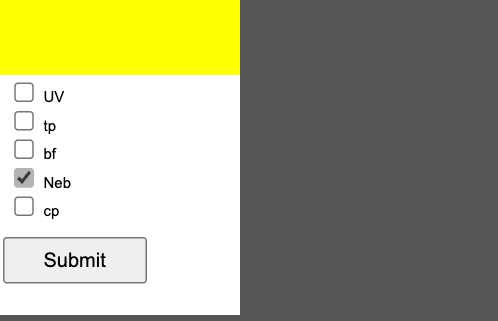

In [7]:
from agentlab.experiments.loop import ExpResult

# lazy loader for all the information of on experiment (1 agent on 1 task)
result = ExpResult(result_df.iloc[0].exp_dir)

episode = result.steps_info
print(f"action: {episode[1].action}")
print(f"reward: {episode[1].reward}")
print(f"AXTree: {episode[1].obs['axtree_txt'][:500]}")

# formatted as an array
print(f"screenshot type: {type(episode[1].obs['screenshot'])}")

# loading from png
display(result.get_screenshot(1))

### list keys in the observations dict

In [10]:
import json

print(f"Obs Keys:\n  {'\n  '.join(list(episode[1].obs.keys()))}")

SyntaxError: f-string expression part cannot include a backslash (2405050158.py, line 3)

## extra_elements_properties
contains a dictionnary for the bounding box and visible properties of each elements in the page

In [9]:
extra_properties = json.dumps(episode[1].obs["extra_element_properties"], indent=2)
print(extra_properties)

NameError: name 'json' is not defined